# Contextual Information

#### Data source
Dataset is retrieved from Kaggle, based on Open Data Commons Open Database License (ODbL).

Link: <a href="https://www.kaggle.com/datasets/albertovidalrod/electricity-consumption-uk-20092022/data">Electricty Consumption UK 2009/2024</a>

The columns in the dataset are:
- **SETTLEMET_DATA:** date in format dd/mm/yyyy
- **SETTLEMENT_PERIOD:** half hourly period for the historic outtunr occurred
- **ND (National Demand):** National Demand is the sum of metered generation, but excludes generation required to meet station load, pump storage pumping and interconnector exports. National Demand is calculated as a sum of generation based on National Grid ESO operational generation metering. Measured in MW.
- **TSD (Transmission System Demand):** Transmission System Demand is equal to the ND plus the additional generation required to meet station load, pump storage pumping and interconnector exports. Measured in MW.
- **ENGLAND_WALES_DEMAND:** England and Wales Demand, as ND above but on an England and Wales basis. Measured in MW.
- **EMBEDDED_WIND_GENERATION:** This is an estimate of the GB wind generation from wind farms which do not have Transmission System metering installed. These wind farms are embedded in the distribution network and invisible to National Grid ESO. Their effect is to suppress the electricity demand during periods of high wind. The true output of these generators is not known so an estimate is provided based on National Grid ESO’s best model. Measured in MW.
- **EMBEDDED_WIND_CAPACITY:** This is National Grid ESO’s best view of the installed embedded wind capacity in GB. This is based on publicly available information compiled from a variety of sources and is not the definitive view. It is consistent with the generation estimate provided above. Measured in MW
- **EMBEDDED_SOLAR_GENERATION:** This is an estimate of the GB solar generation from PV panels. These are embedded in the distribution network and invisible to National Grid ESO. Their effect is to suppress the electricity demand during periods of high radiation. The true output of these generators is not known so an estimate is provided based on National Grid ESO’s best model. Measured in MW.
- **EMBEDDED_SOLAR_CAPACITY:** As embedded wind capacity above, but for solar generation. Measured in MW.
- **NON_BM_STOR: (Non-Balancing Mechanism SHort-Term Operating Reserve):** For units that are not included in the ND generator definition. This can be in the form of generation or demand reduction. Measured in MW.
- **PUMP_STORAGE_PUMPING:** The demand due to pumping at hydro pump storage units; the -ve signifies pumping load.
- **IFA_FLOW (IFA Interconnector Flow):** The flow on on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
- **IFA2_FLOW (IFA Interconnector Flow):** The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
- **MOYLE_FLOW (Moyle Interconnector FLow):** The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
- **EAST_WEST_FLOW (East West Innterconnector FLow):** The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
- **NEMO_FLOW (Nemo Interconnector FLow):** The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
- **NSL_FLOW (North Sea Link Interconnector Flow):** The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
- **ELCLINK_FLOW:** Blank


# Setup

In [1]:
from src.preprocessing import load_data, preprocess_data, create_time_features, create_lag_features
from src.visualization import demand_over_time, fixedPeriod_Data, demand_by_Hour, decompose_seasonality
from src.modelling import train_test_split, train_test_split_plot, prophet_model, prophet_model_evaluation, xgboost_model, xgboost_model_evaluation

c:\Users\Kevin\OneDrive\Personal\GitHub\time-series-energy-forecasting\time-series-energy-forecasting\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data Preparation

In [2]:
df = load_data('data/historic_demand_2009_2024_noNaN.csv','settlement_date','nd')
df.info()

c:\Users\Kevin\OneDrive\Personal\GitHub\time-series-energy-forecasting\time-series-energy-forecasting\src\preprocessing.py:23: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278512 entries, 0 to 278511
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   settlement_date  278512 non-null  object
 1   nd               278512 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ MB


In [3]:
df = preprocess_data(df,'settlement_date')
df.head(2)

,nd
settlement_date,
2009-01-01 00:00:00,37910
2009-01-01 00:30:00,38047


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 278512 entries, 2009-01-01 00:00:00 to 2024-12-05 23:30:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   nd      278512 non-null  int64
dtypes: int64(1)
memory usage: 4.2 MB


# Exploratory Data Analysis

### National Demand over Time (in MW)

c:\Users\Kevin\OneDrive\Personal\GitHub\time-series-energy-forecasting\time-series-energy-forecasting\src\visualization.py:50: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(df.index, trend(x), color='black', linewidth=2, label='Trend Line')


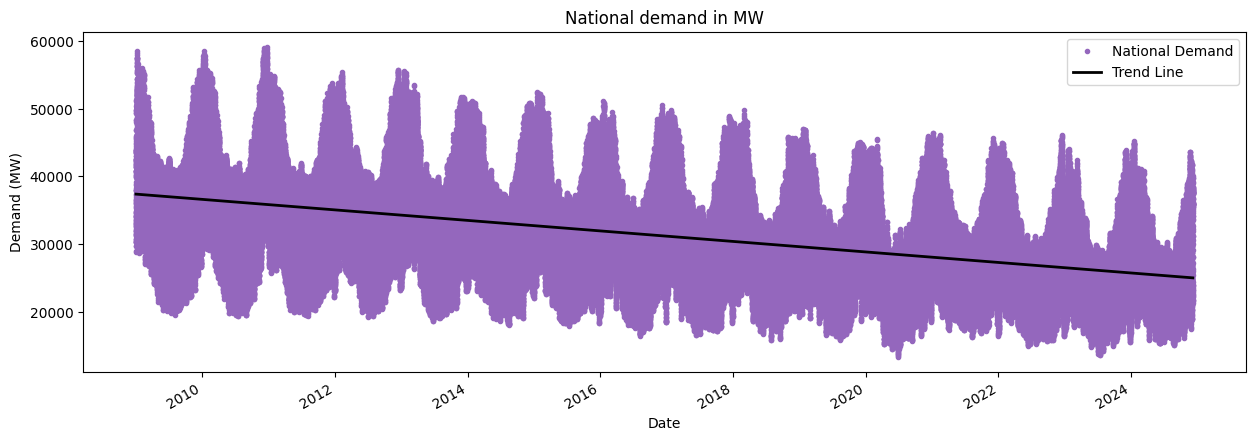

In [5]:
demand_over_time(df)

### National Demand over a Fixed Period of Time

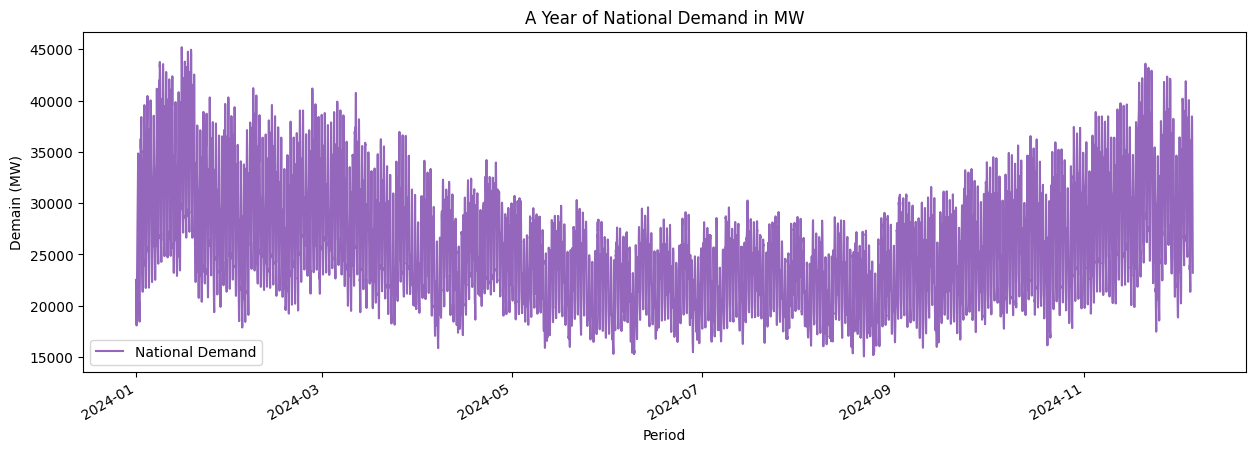

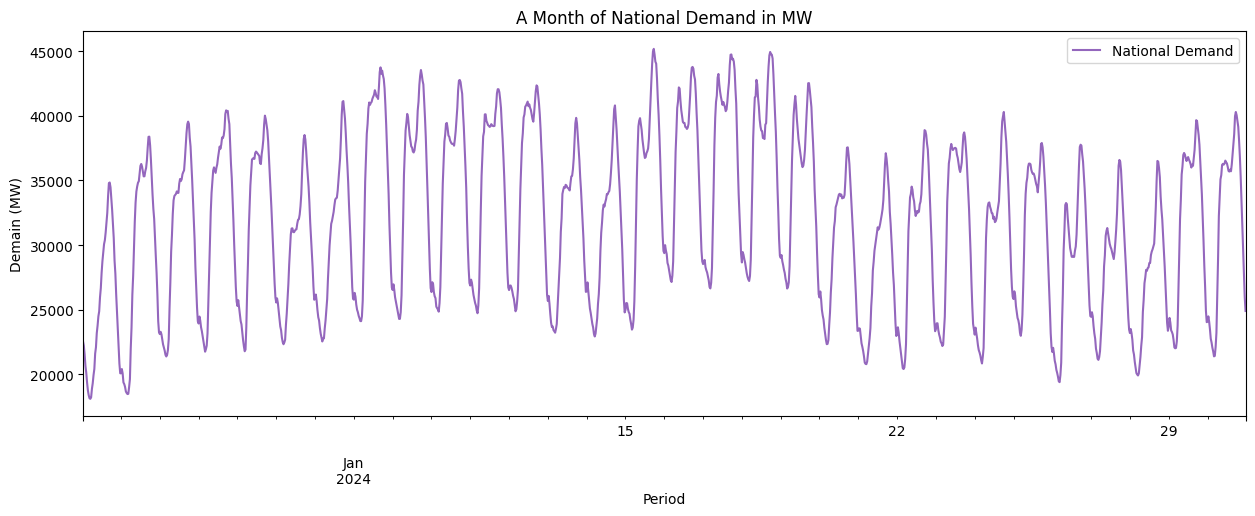

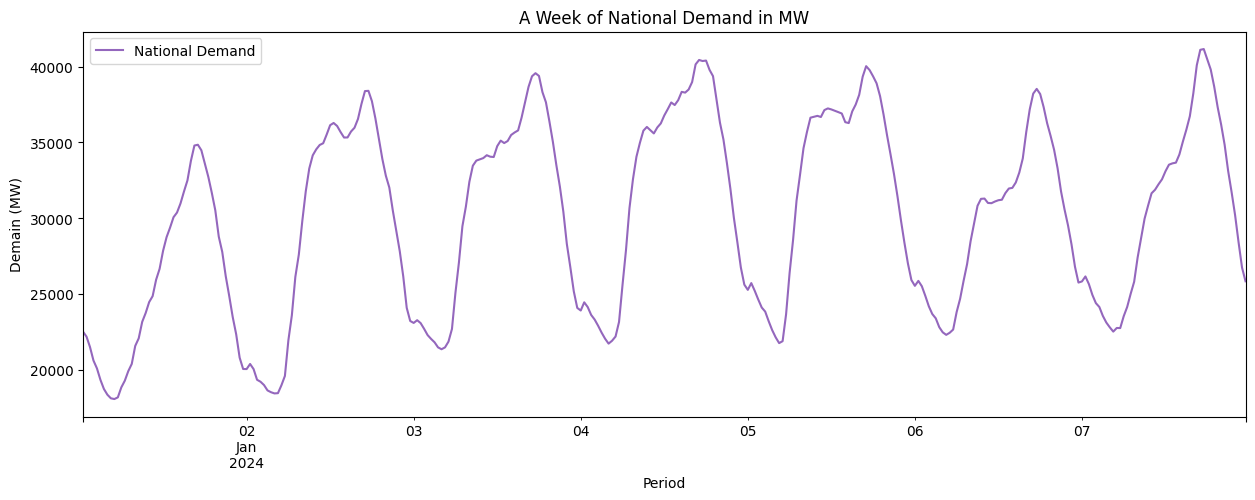

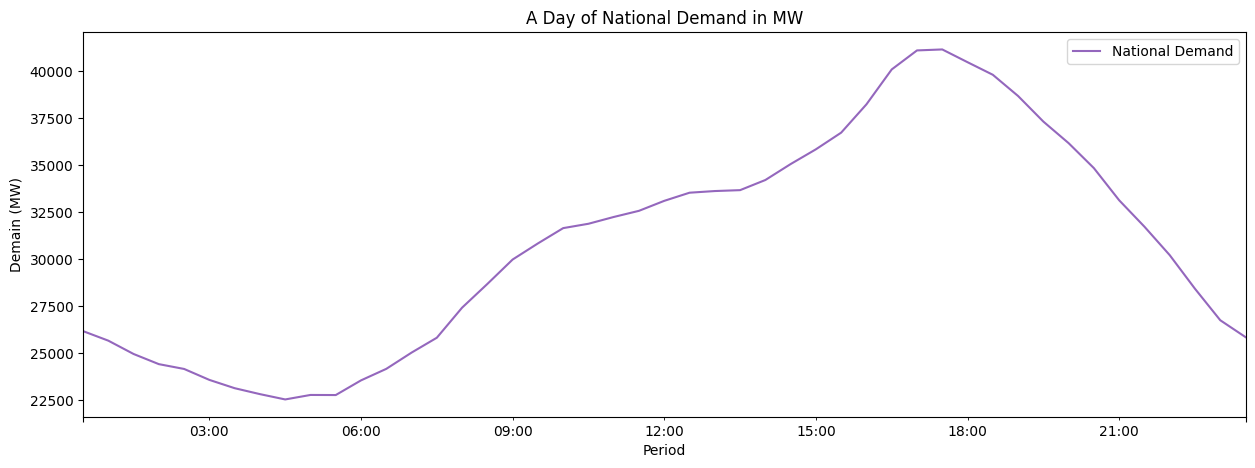

In [6]:
fixedPeriod_Data(df, '01-01-2024', '12-31-2024', 'A Year of')
fixedPeriod_Data(df, '01-01-2024', '01-31-2024', 'A Month of')
fixedPeriod_Data(df, '01-01-2024', '01-08-2024', 'A Week of')
fixedPeriod_Data(df, '01-07-2024', '01-08-2024', 'A Day of')

### Decompose Seasonality

#### Daily

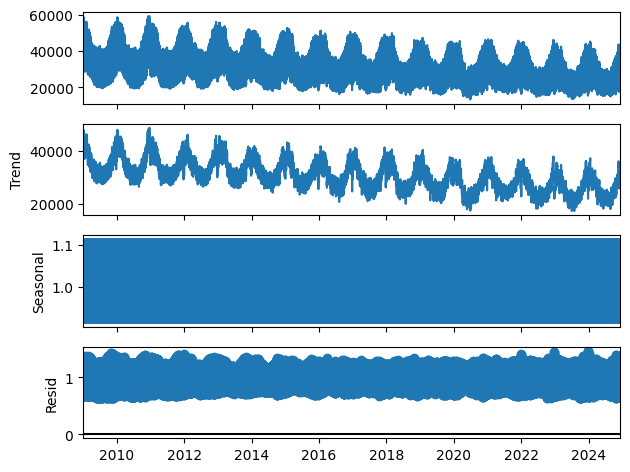

In [7]:
decompose_seasonality(df, 48)

#### Monthly

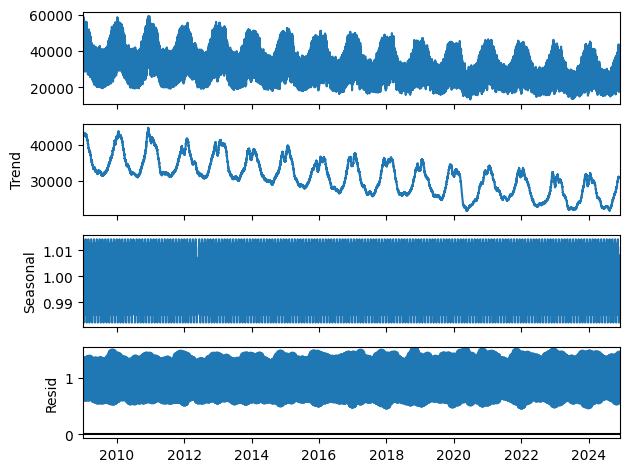

In [8]:
decompose_seasonality(df, 1461)

#### Yearly

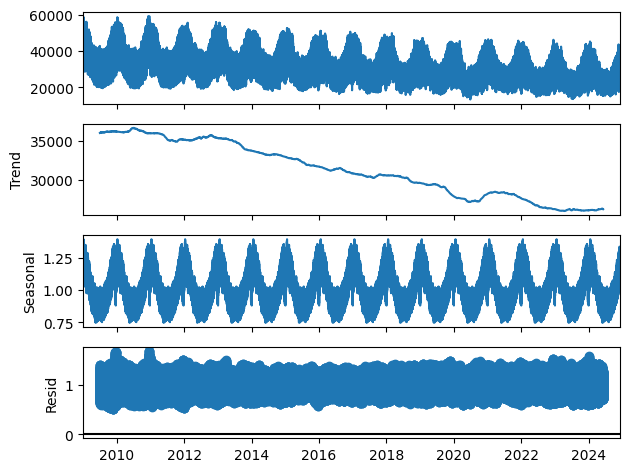

In [9]:
decompose_seasonality(df, 17520)

#### Main Findings

- Time series has a yearly seasonal patter
- National Demand has consistenly decreased over time
- Electricity demand shows a significant increase from 6am to 9am, then it slows down until 1-2pm. The second wave of demand starts at 2pm and reaches its peak at 6-7pm. After that, it gradually decreases until 6am the next day.

# Feature Creation

In [10]:
#Create dataframe with lag features for XGBoost Model
df_lag = create_lag_features(df, demand_Col='nd')
df_lag.head(2)

,nd,lag_1,lag_2,lag_4,lag_48,lag_336,lag_17520,rolling_mean_48,rolling_std_48,rolling_mean_336,rolling_std_336
settlement_date,,,,,,,,,,,
2010-01-03 01:00:00,34544,35234.0,35523.0,36162.0,33647.0,30991.0,37910.0,38304.979167,5947.332105,37855.232143,6074.946126
2010-01-03 01:30:00,33521,34544.0,35234.0,35069.0,32781.0,30205.0,38047.0,38323.666667,5933.778375,37865.806548,6066.047940


In [11]:
#Create dataframe with time features for Prohpet Model and common visualizations
df = create_time_features(df)

### Visualizing features

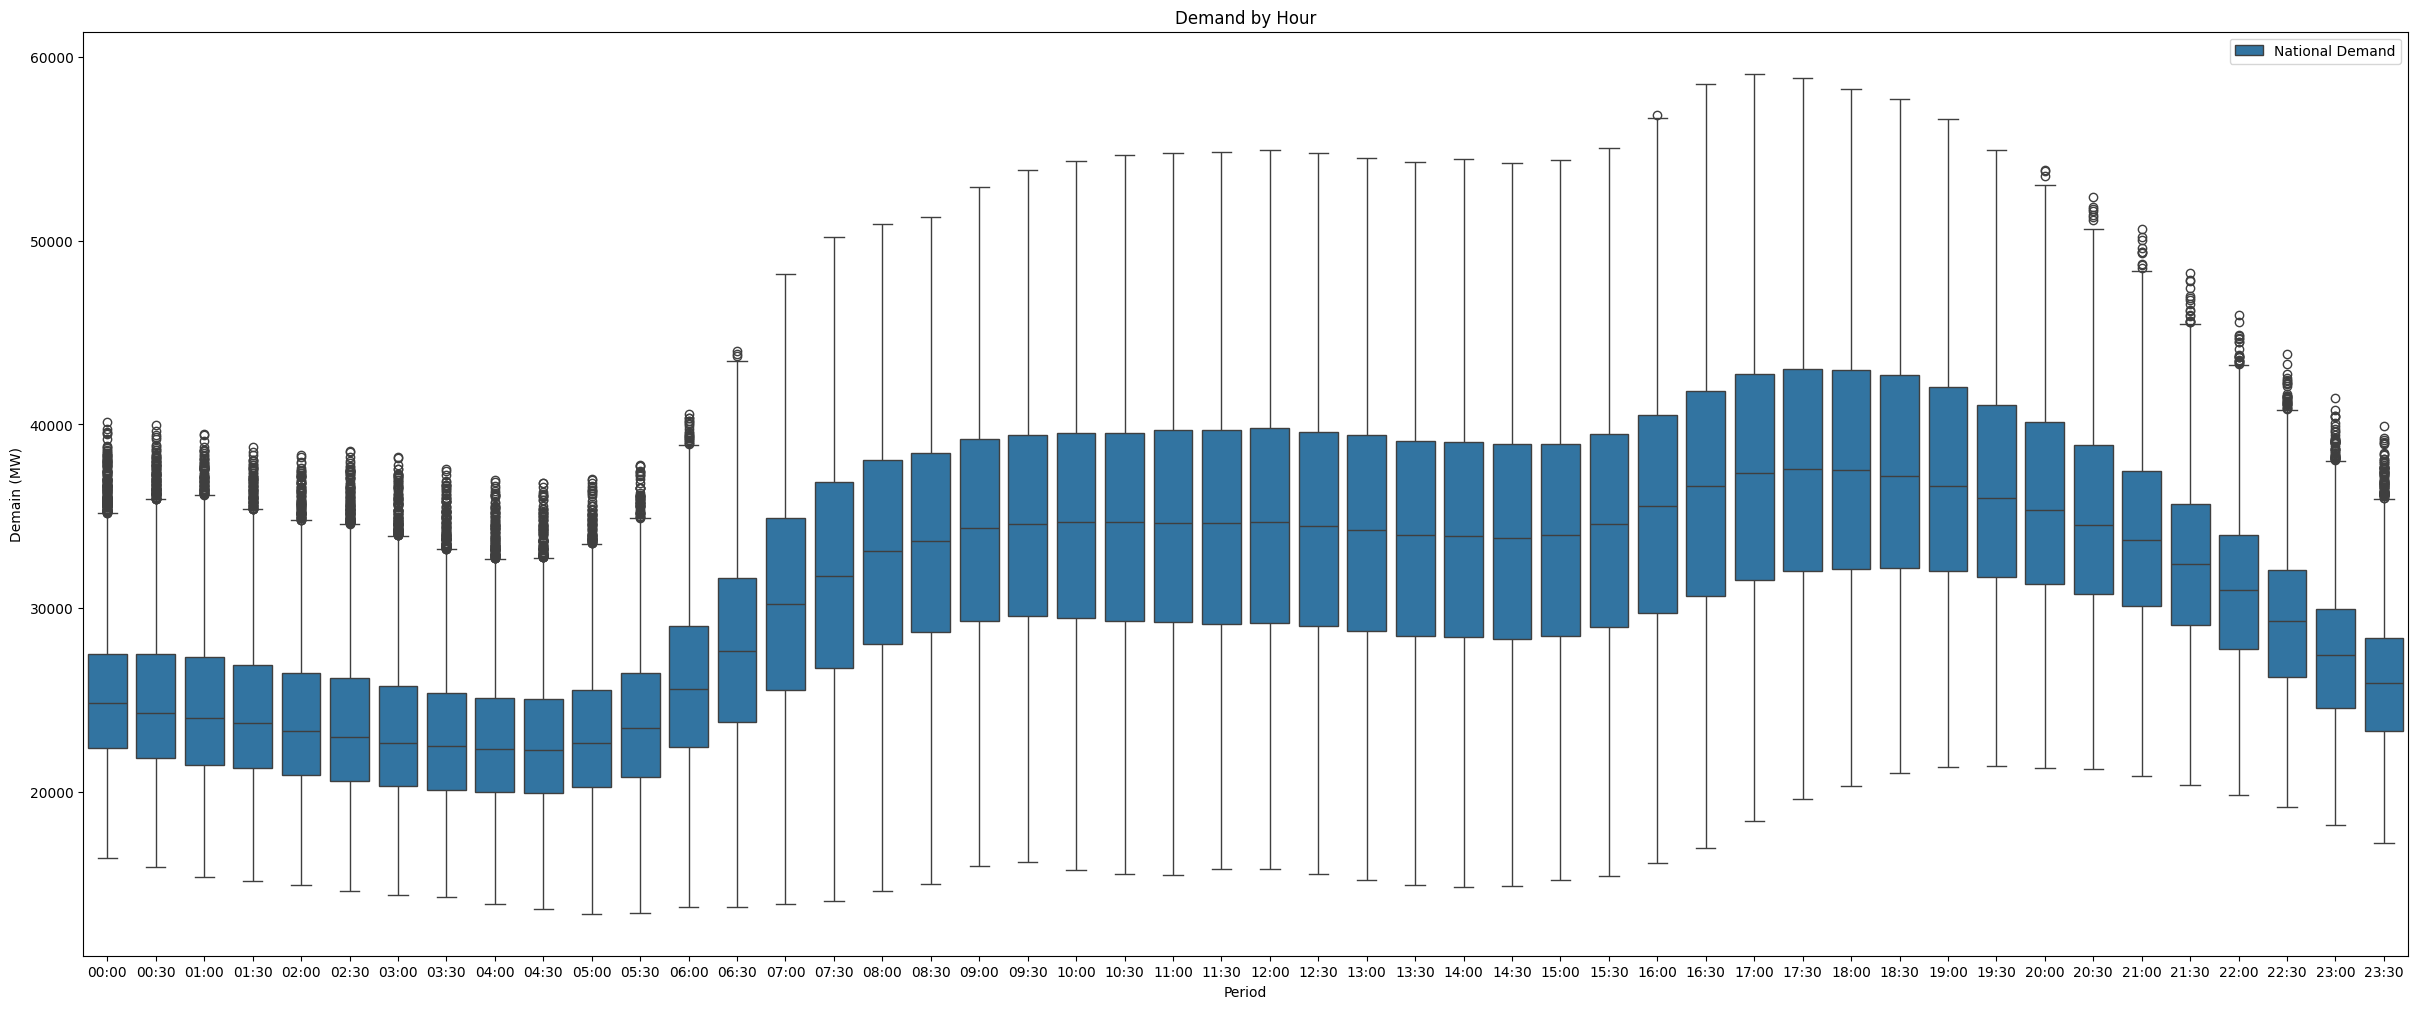

In [12]:
demand_by_Hour(df)

#### Main Findings

As mentioned before, the demand significantly increases between 6am-9am and 3pm-7pm.
Highest demand happens between 5pm and 7pm.

# Modelling ( why did I choose this models?())

#### Train/Test Data

In [13]:
train, test, X_train, y_train, X_test, y_test, FEATURES, TARGET = train_test_split(df, '01-01-2022', 'nd', exclude_cols=['hour_fixed'])

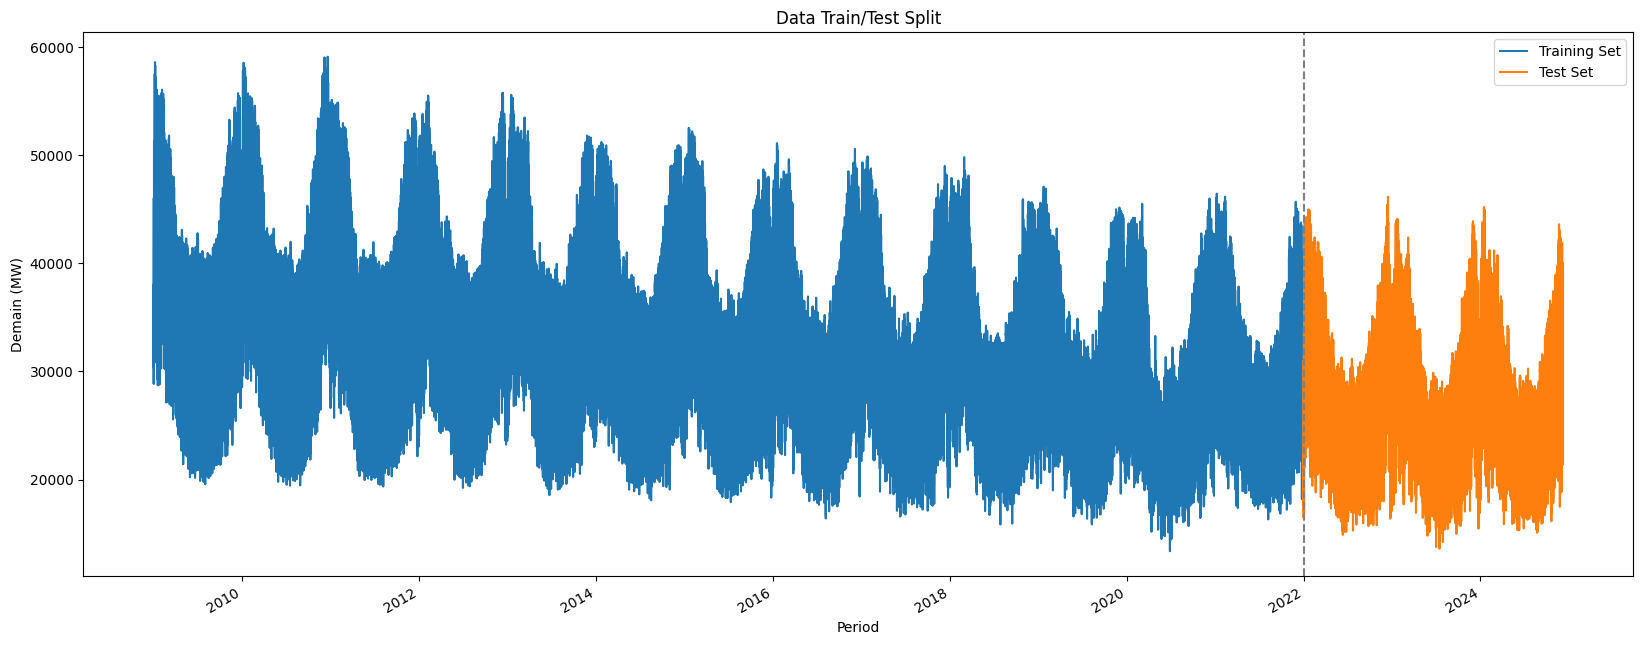

In [14]:
train_test_split_plot(df, '01-01-2022', 'nd')

#### Facebook Prophet



In [15]:
prophet_model, forecast = prophet_model(X_train
                  , y_train
                  , X_test
                  , y_test
                  , FEATURES=FEATURES
                  , holidays=None
                  , yearly_seasonality=True
                  , weekly_seasonality=False
                  , daily_seasonality=False)

15:12:48 - cmdstanpy - INFO - Chain [1] start processing
15:14:21 - cmdstanpy - INFO - Chain [1] done processing


⏱️ Execution Time: 119.82 seconds
🧠 Memory Usage (incl. subprocesses): 387.28 MB


In [21]:
prophet_eval = prophet_model_evaluation(prophet_model, forecast, y_test, plot=False)

Mean Absolute Error (MAE): 3182.031713888852
Root Mean Squared Error (RMSE): 4188.884471148286


#### XGBoost

In [17]:
#Redefine X_train, y_train, X_test, y_test based on df with lag features
train, test, X_train, y_train, X_test, y_test, FEATURES, TARGET = train_test_split(df_lag, '01-01-2022', 'nd', exclude_cols=None)

In [18]:
xgboost_model, y_pred = xgboost_model(X_train
              , y_train
              , X_test
              , y_test
              , n_estimators=1000
              , learning_rate=0.01
              , max_depth=6
              , subsample=0.8
              , colsample_bytree=0.8
              , random_state=42)

[0]	validation_0-rmse:7612.23757	validation_1-rmse:8239.09897
[100]	validation_0-rmse:2883.43673	validation_1-rmse:3138.79636
[200]	validation_0-rmse:1199.58621	validation_1-rmse:1298.28344
[300]	validation_0-rmse:659.64663	validation_1-rmse:686.11295
[400]	validation_0-rmse:518.56999	validation_1-rmse:524.36429
[500]	validation_0-rmse:481.21808	validation_1-rmse:486.08599
[600]	validation_0-rmse:464.94016	validation_1-rmse:473.92516
[700]	validation_0-rmse:454.57028	validation_1-rmse:467.21617
[800]	validation_0-rmse:446.71876	validation_1-rmse:461.64378
[900]	validation_0-rmse:440.19813	validation_1-rmse:457.34751
[999]	validation_0-rmse:434.85375	validation_1-rmse:453.90037
⏱️ Execution Time: 9.26 seconds
🧠 Memory Usage (incl. subprocesses): 427.91 MB


In [19]:
xgboost_eval = xgboost_model_evaluation(y_test, y_pred)

Mean Absolute Error (MAE): 349.7882080078125
Root Mean Squared Error (RMSE): 453.90037108929533
